In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from decimal import Decimal

file = r"C:\Users\Cameron\Documents\muckrock\FinancialStatement.csv"

#Importing file and converting the Date/Balance columns to datetime/integer format for further analysis
df = pd.read_csv(file)

dates = df['Date']
datetime = []
for date in dates:
    datetime.append(parser.parse(date))
df['Date'] = datetime 

df['Balance'] = df['Balance'].str.split(',').str.join('')
df['Balance'] = df['Balance'].apply(lambda x: float(x))
df['Balance'] = df['Balance'].apply(lambda x: int(x))

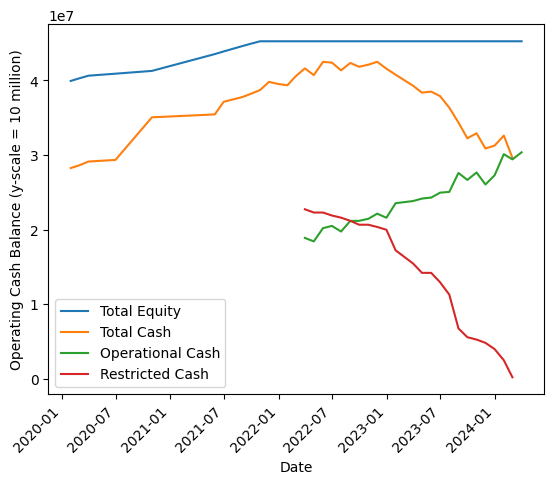

In [ ]:
#Operating and Restricted Cash
cashO = df.loc[df['AssetType'] == 'Cash--Operating']
cashO = cashO.sort_values(by='Date').reset_index()
cashR = df.loc[df['AssetType'] == 'Cash--Restricted']
cashR = cashR.sort_values(by='Date').reset_index()

cashCombined = cashR.copy(deep=True)

#Summing Operating/Restricted to get Total Cash Value for post-2021 data
summedCash = []
for i in range(len(cashR['AssetType'])):
    sum = cashO.iloc[i, 3] + cashR.iloc[i, 3]
    summedCash.append(sum)
cashCombined['Balance'] = summedCash

cash = df.loc[df['AssetType'] == 'Cash']
summedCash = pd.concat([cash, cashCombined], ignore_index=True)

#Total Equity
equity = df.loc[df['AssetType'] == 'EQUITY']

#Sort all by date
sortedCash = cashCombined.sort_values(by='Date')
sortedEquity = equity.sort_values(by='Date')
sortedCombined = summedCash.sort_values(by='Date')

plt.xticks(rotation=45, ha='right')
plt.plot(sortedEquity['Date'], sortedEquity['Balance'], label="Total Equity")
plt.plot(sortedCombined['Date'], sortedCombined['Balance'], label="Total Cash")
plt.plot(cashO['Date'], cashO['Balance'], label="Operational Cash")
plt.plot(cashR['Date'], cashR['Balance'], label="Restricted Cash")
plt.xlabel("Date")
plt.ylabel("Operating Cash Balance (y-scale = 10 million)")
plt.legend(loc="lower left")

plt.show()

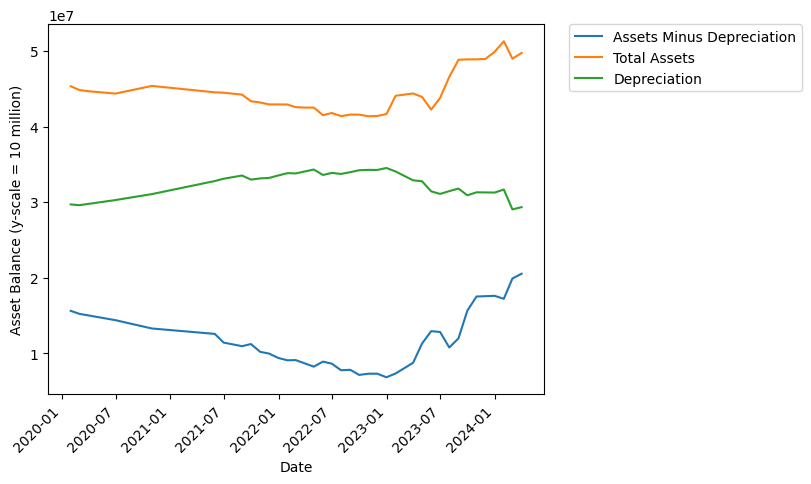

In [59]:
#Assets and their depreciation
fixedAssets = df.loc[df['AssetType'] == 'Fixed Assets']
fixedAssets = fixedAssets.sort_values(by='Date').reset_index()
deprec = df.loc[df['AssetType'] == 'Less Accum Depreciation']
deprec = deprec.sort_values(by='Date').reset_index()

assetTot = deprec.copy(deep=True).copy(deep=True)

#Subtracting depreciation from asset values
assetMinDep = []
for i in range(len(assetTot['AssetType'])):
    sum = fixedAssets.iloc[i, 3] - deprec.iloc[i, 3]
    assetMinDep.append(sum)
assetTot['Balance'] = assetMinDep

sortedAsset = assetTot.sort_values(by='Date')

plt.xticks(rotation=45, ha='right')
plt.plot(sortedAsset['Date'], sortedAsset['Balance'], label="Assets Minus Depreciation")
plt.plot(fixedAssets['Date'], fixedAssets['Balance'], label="Total Assets")
plt.plot(deprec['Date'], deprec['Balance'], label="Depreciation")
plt.xlabel("Date")
plt.ylabel("Asset Balance (y-scale = 10 million)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()